yangın katları için ayrı yap
yangın katlarının üzerindekileri birleştirerek yap

In [1]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
data = pd.read_excel('DATA SON SPSS.xlsx', skiprows=2)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.columns = ['label', 'scenario', 'building', 'floor', 'fire_h', 'fire_floor', 'fire_spread', 'door_condition',
                'evacuation_delay', 'tenability_1', 'tenability_2', 'FIH', 'FIN']

In [4]:
scn_rp={'Senaryo 1: 0H-1R-Low-Open Door': 'Senaryo 1',
        'Senaryo 2: 0H-3R-Low-Open Door': 'Senaryo 2',
        'Senaryo 3: 0h-1R-Low-Leaky': 'Senaryo 3',
        'Senaryo 4: 0h-3R-Low-Leaky': 'Senaryo 4',
        'Senaryo 5: 0h-1R-Medium-Open': 'Senaryo 5',
        'Senaryo 6:0h-3R-Medium-Open Door': 'Senaryo 6',
        'Senaryo 7:0h-1R-Medium-Leaky': 'Senaryo 7',
        'Senaryo 8: 0h-3R-Medium-Leaky': 'Senaryo 8',
        'Senaryo 9:0h-1R-High-Open': 'Senaryo 9',
        'Senaryo 10: 0H-3R-High-Open Door': 'Senaryo 10',
        'Senaryo 11: 0h-1R-High-Leaky': 'Senaryo 11',
        'Senaryo 12: 0h-3R-High-Leaky': 'Senaryo 12',
        'Senaryo 13: 0.25H-1R-Low-Open Door': 'Senaryo 13',
        'Senaryo 14: 0.25H-3R-Low-Open Door': 'Senaryo 14',
        'Senaryo 15: 0.25h-1R-Low-Leaky': 'Senaryo 15',
        'Senaryo 16: 0.25h-3R-Low-Leaky': 'Senaryo 16',
        'Senaryo 17: 0.25h-1R-Medium-Open': 'Senaryo 17',
        'Senaryo 18:0.25h-3R-Medium-Open Door': 'Senaryo 18',
        'Senaryo 19:0.25h-1R-Medium-Leaky': 'Senaryo 19',
        'Senaryo 20: 0.25h-3R-Medium-Leaky': 'Senaryo 20',
        'Senaryo 21:0.25h-1R-High-Open': 'Senaryo 21',
        'Senaryo 22: 0.25H-3R-High-Open Door': 'Senaryo 22',
        'Senaryo 23: 0.25h-1R-High-Leaky': 'Senaryo 23',
        'Senaryo 24: 0.25h-3R-High-Leaky': 'Senaryo 24',
        'Senaryo 25: 0.5H-1R-Low-Open Door': 'Senaryo 25',
        'Senaryo 26: 0.5H-3R-Low-Open Door': 'Senaryo 26',
        'Senaryo 27: 0.5h-1R-Low-Leaky': 'Senaryo 27',
        'Senaryo 28: 0.5h-3R-Low-Leaky': 'Senaryo 28',
        'Senaryo 29: 0.5h-1R-Medium-Open': 'Senaryo 29',
        'Senaryo 30:0.5h-3R-Medium-Open Door': 'Senaryo 30',
        'Senaryo 31:0.5h-1R-Medium-Leaky': 'Senaryo 31',
        'Senaryo 32: 0.5h-3R-Medium-Leaky': 'Senaryo 32',
        'Senaryo 33:0.5h-1R-High-Open': 'Senaryo 33',
        'Senaryo 34: 0.5H-3R-High-Open Door': 'Senaryo 34',
        'Senaryo 35: 0.5h-1R-High-Leaky': 'Senaryo 35',
        'Senaryo 36: 0.5h-3R-High-Leaky': 'Senaryo 36',
        'Senaryo 37: 0.75H-1R-Low-Open Door': 'Senaryo 37',
        'Senaryo 38: 0.75H-3R-Low-Open Door': 'Senaryo 38',
        'Senaryo 39: 0.75h-1R-Low-Leaky': 'Senaryo 39',
        'Senaryo 40: 0.75h-3R-Low-Leaky': 'Senaryo 40',
        'Senaryo 41: 0.75h-1R-Medium-Open': 'Senaryo 41',
        'Senaryo 42:0.75h-3R-Medium-Open Door': 'Senaryo 42',
        'Senaryo 43:0.75h-1R-Medium-Leaky': 'Senaryo 43',
        'Senaryo 44: 0.75h-3R-Medium-Leaky': 'Senaryo 44',
        'Senaryo 45:0.75h-1R-High-Open': 'Senaryo 45',
        'Senaryo 46: 0.75H-3R-High-Open Door': 'Senaryo 46',
        'Senaryo 47: 0.75h-1R-High-Leaky': 'Senaryo 47',
        'Senaryo 48: 0.75h-3R-High-Leaky': 'Senaryo 48'}

In [5]:
data['scenario'] = data['scenario'].replace(scn_rp)

In [6]:
data.head(3)

,label,scenario,building,floor,fire_h,fire_floor,fire_spread,door_condition,evacuation_delay,tenability_1,tenability_2,FIH,FIN
0,1,Senaryo 1,1,1,0h,1,1R,Open,Low,3,3,0.00,0.0
1,2,Senaryo 1,1,1,0h,1,1R,Open,Low,3,3,0.05,0.0
2,3,Senaryo 1,1,1,0h,1,1R,Open,Low,3,3,0.38,0.0


In [7]:
fire_floors = {1:[1,10,19,34],
               2:[1,5,9,14],
               3:[1,6,12,18],
               4:[1,8,15,23],
               5:[1,5,10,16]}

In [8]:
dist_list =  [
 'norm',
 'alpha',
 'arcsine',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'expon',
 'exponnorm',
 'exponweib',
 'exponpow',
 'f',
 'foldnorm',
 'weibull_min',
 'weibull_max',
 'genlogistic',
 'genpareto',
 'genexpon',
 'genextreme',
 'gamma',
 'erlang',
 'gengamma',
 'genhyperbolic',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'gausshyper',
 'invgamma',
 'invgauss',
 'norminvgauss',
 'invweibull',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'logistic',
 'loggamma',
 'loglaplace',
 'lognorm',
 'maxwell',
 'mielke',
 'kappa4',
 't',
 'pareto',
 'lomax',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rdist',
 'rayleigh',
 'loguniform',
 'reciprocal',
 'rice',
 'recipinvgauss',
 'semicircular',
 'skewcauchy',
 'skewnorm',
 'trapezoid',
 'trapz',
 'triang',
 'truncexpon',
 'truncnorm',
 'tukeylambda',
 'uniform',
 'vonmises',
 'vonmises_line',
 'wald',
 'wrapcauchy',
 'gennorm',
 'halfgennorm',
 'crystalball',
 'argus',
 'studentized_range']

In [9]:
def get_best_distribution_v1(data):
    dist_names = dist_list
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        # print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [10]:
def get_best_distribution_v1(data):
        
    dist_results = []
    params = {}
    
    for distribution in dist_list:
        dist = getattr(st, distribution)
        param = dist.fit(data)
        
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, distribution, args=param)
        '''
        s, c, sig = st.anderson(data, dist=distribution)
        if sum(s<cv)>0:
            and_res = 'accepted'
        else:
            and_res = 'rejected'
        '''
        dist_results.append((distribution, param, p))
        
    return dist_results

In [14]:
sample = data['FIH'].sample(100, random_state=1)

In [15]:
sample

44337    0.00
76668    0.00
88842    0.00
24567    0.01
74893    0.69
         ... 
67917    1.00
15711    0.00
54817    0.86
39543    0.00
6355     0.00
Name: FIH, Length: 100, dtype: float64

In [16]:
res = get_best_distribution_v1(sample)

In [ ]:
asda

In [17]:
res_df = pd.DataFrame(res)

In [18]:
res_df

,0,1,2
0,norm,"(0.1875, 0.36511196912728017)",4.946840e-17
1,alpha,"(2.2100617910413263, -8.089275339867713e-21, 2...",2.068831e-22
2,arcsine,"(-0.09850603366048286, 1.098506033660483)",1.955861e-27
3,beta,"(0.034285862518107085, 0.12518964827107076, -0...",1.072194e-54
4,betaprime,"(0.49750780821225726, 2.3634386912701597, -2.8...",6.599440e-55
...,...,...,...
75,gennorm,"(0.4497074047014539, 5.347909584012531e-15, 0....",1.213143e-23
76,halfgennorm,"(0.2773766104795846, -4.727293756180295e-22, 0...",6.599440e-55
77,crystalball,"(103.30888425585985, 1.4693170417421542, 0.187...",4.946826e-17
78,argus,"(9.089595141450536e-05, -0.6461118769606484, 1...",1.730732e-26


In [19]:
res_df.sort_values(by=2, ascending=False).head(10)

,0,1,2
41,logistic,"(0.09656123913213378, 0.17511715558334517)",1.742423e-12
72,vonmises_line,"(1.5508455242792516, 0.08599995131624377, 0.29...",6.058757e-13
30,hypsecant,"(0.05716719470259584, 0.18283570135668753)",4.158398e-15
23,genextreme,"(-1.0999836280891313, -2.885210983454657e-22, ...",1.917883e-16
42,loggamma,"(1294.541445001586, -94.96299466069314, 13.278...",6.825737e-17
0,norm,"(0.1875, 0.36511196912728017)",4.946840e-17
77,crystalball,"(103.30888425585985, 1.4693170417421542, 0.187...",4.946826e-17
62,skewcauchy,"(0.002433153738567631, 3.141248380869769e-23, ...",6.790607e-18
20,genlogistic,"(2359.0932175242397, -1.3551443409072057, 0.18...",1.699050e-19
19,weibull_max,"(256121428.7677397, 46258074.6472704, 46258074...",1.425799e-19


<AxesSubplot:ylabel='Frequency'>

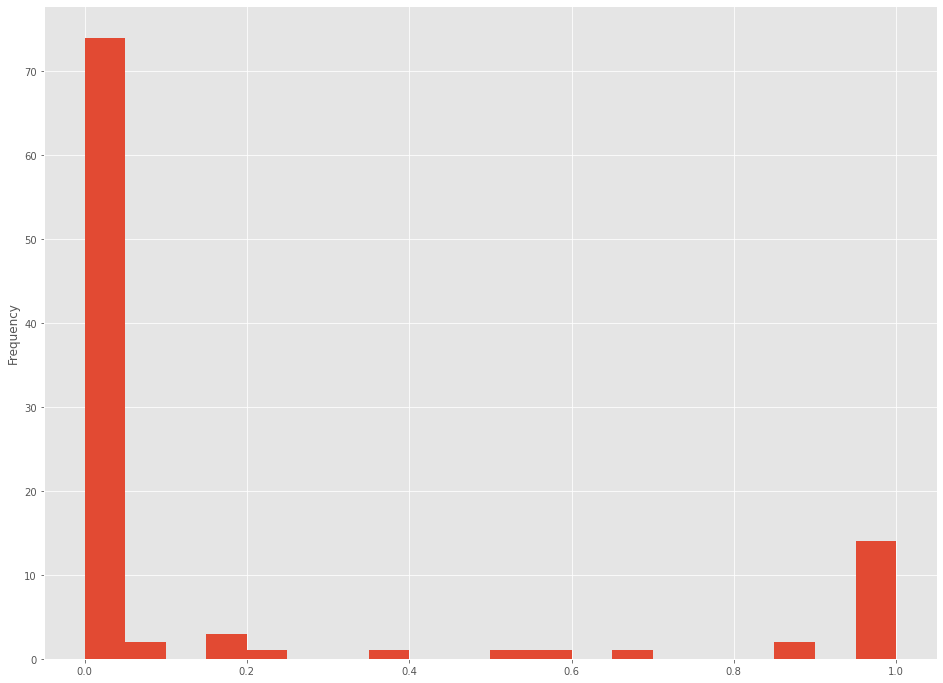

In [22]:
sample.plot(kind='hist', bins=20)

In [ ]:
make_pdf(dist, params, size=10000)

In [25]:
dist, params = res_df.sort_values(by=2, ascending=False).head(1)[0], res_df.sort_values(by=2, ascending=False).head(1)[1] 

In [29]:
params.values[0]

(0.09656123913213378, 0.17511715558334517)

<AxesSubplot:>

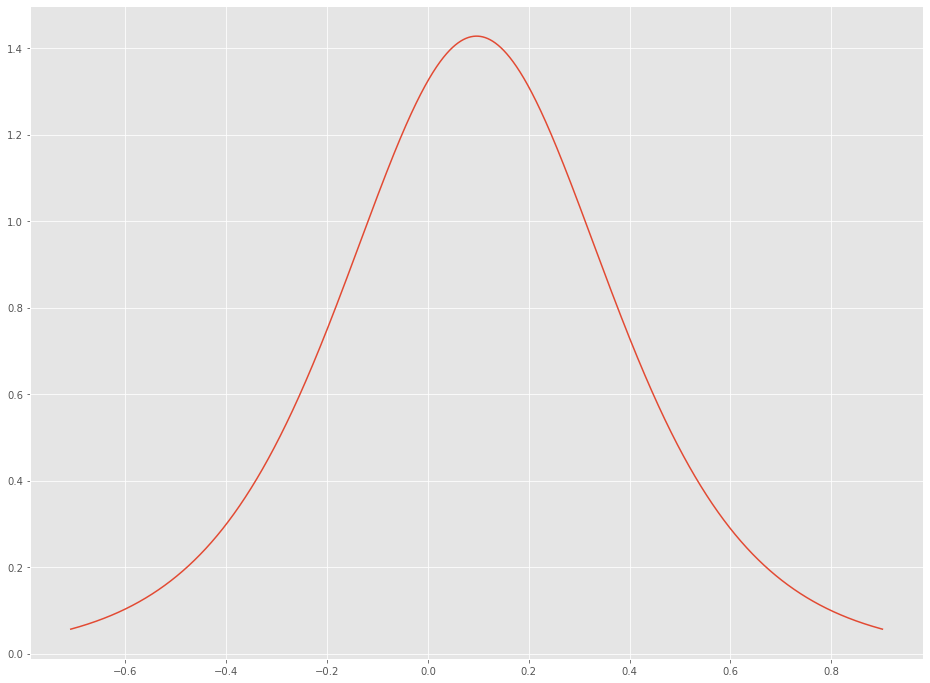

In [33]:
make_pdf(dist.values[0], params.values[0], size=10000).plot()

In [ ]:
   # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        # print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])[0]

In [ ]:
def get_best_distribution_v2(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        # print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])[0]

In [31]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    dist = getattr(st, dist)
    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [ ]:
get_best_distribution_v1(data['FIH'])

In [ ]:
best_distibution = get_best_distribution_v2(data['FIH'], 200)

In [ ]:
best_distibution

In [ ]:
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All Fitted Distributions')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

print(time.time() - t1)

In [ ]:
sns.distplot(data['FIH']).set(title='Distribution for FIH')

In [ ]:
sns.distplot(data['FIN']).set(title='Distribution for FIN')

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1        
https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

In [ ]:
best_dist, best_p, params = get_best_distribution_v1(data['FIH'])
best_distibution = get_best_distribution_v2(data, 200, ax)

In [ ]:
i = 0
all_scenarios = data['scenario'].unique()

for building, ffloors in fire_floors.items():
    
    max_building_floor = data[data['building']==building]['floor'].max()
        
    for ff in ffloors:
        f_start = ff+1
        while f_start < max_building_floor:
            f_end = f_start+4
            if max_building_floor - f_end < 2:
                f_end = max_building_floor
            
            for scen in all_scenarios:
                
                sample = data.loc[(data['scenario']==scen)&(data['building']==building)&(data['floor']>=f_start)&(data['floor']<=f_end), 'FIH']
                
                plt.figure(i)          
                sns.distplot(sample)
                i += 1
            f_start += 5

In [ ]:
sns.distplot(sample)

In [ ]:
intervals = pd.read_excel('intervals.xlsx', 'Sheet2')

In [ ]:
import time

In [ ]:
20*48*71/60/60

In [ ]:
354000/60/60